In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline
import warnings
warnings.filterwarnings('ignore')

UsageError: Line magic function `%matplotlib.inline` not found.


In [7]:
df =pd.read_csv('data.csv',encoding='unicode_escape')

/var/folders/cs/pq8gndyx4v383pnzz36t397c0000gn/T/ipykernel_1074/1682093081.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv('data.csv',encoding='unicode_escape')


In [8]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Understanding

In [9]:
df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [10]:
df.shape

(435742, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [12]:
df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [13]:
df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [14]:
df.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

In [15]:
df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

### Data Visulization

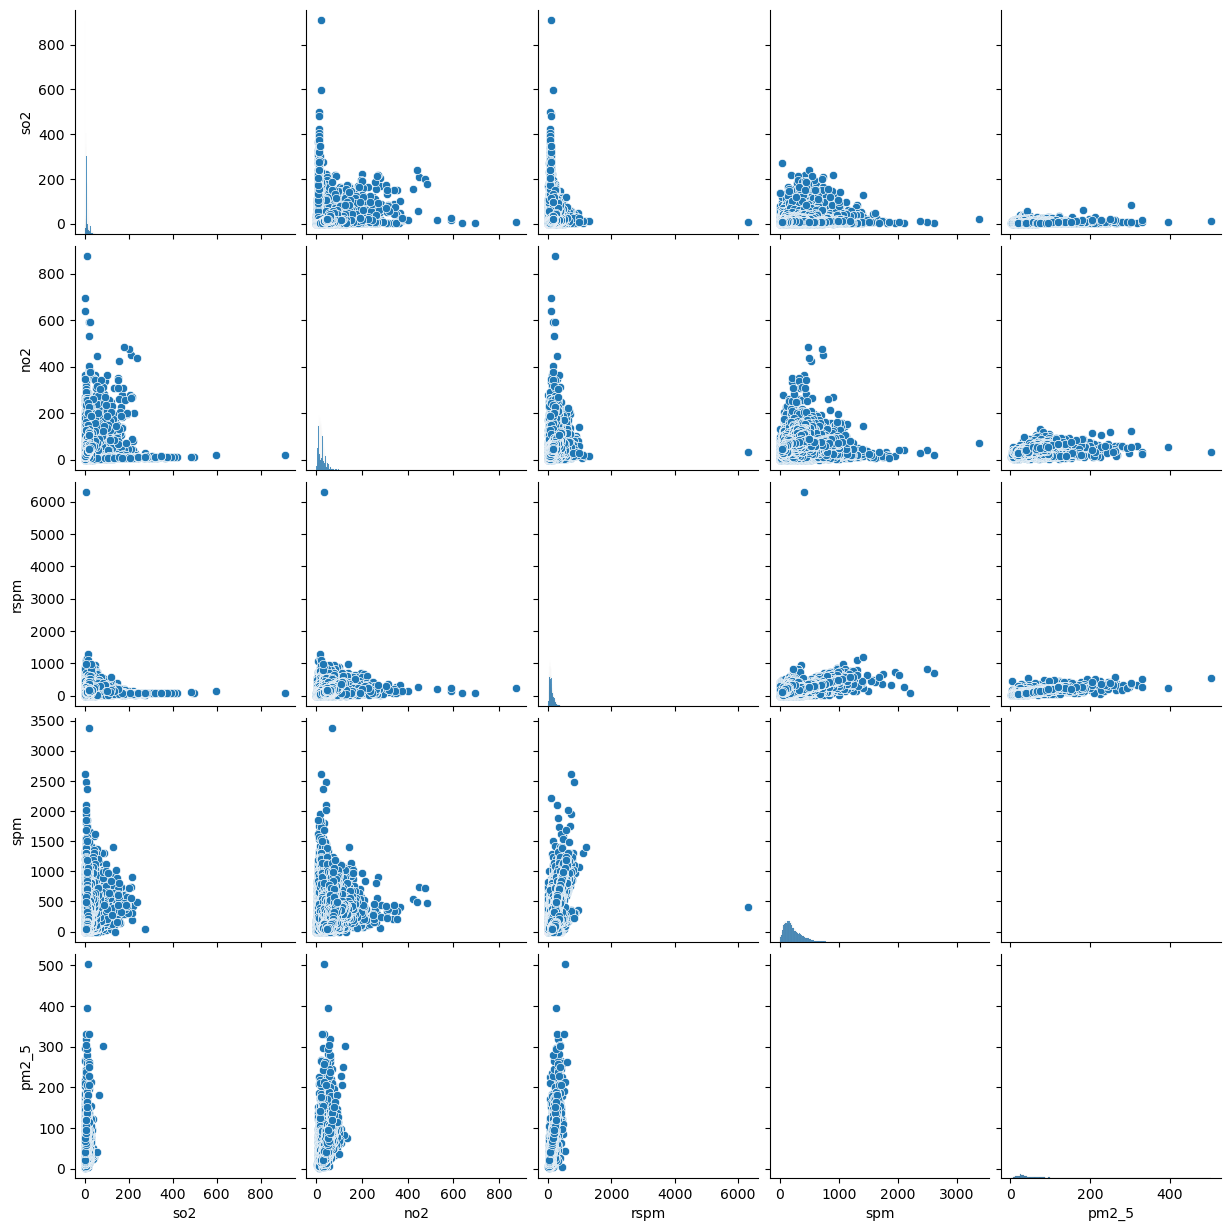

In [16]:
sns.pairplot(data=df)

In [17]:
df['state'].value_counts()

state
Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     

[]

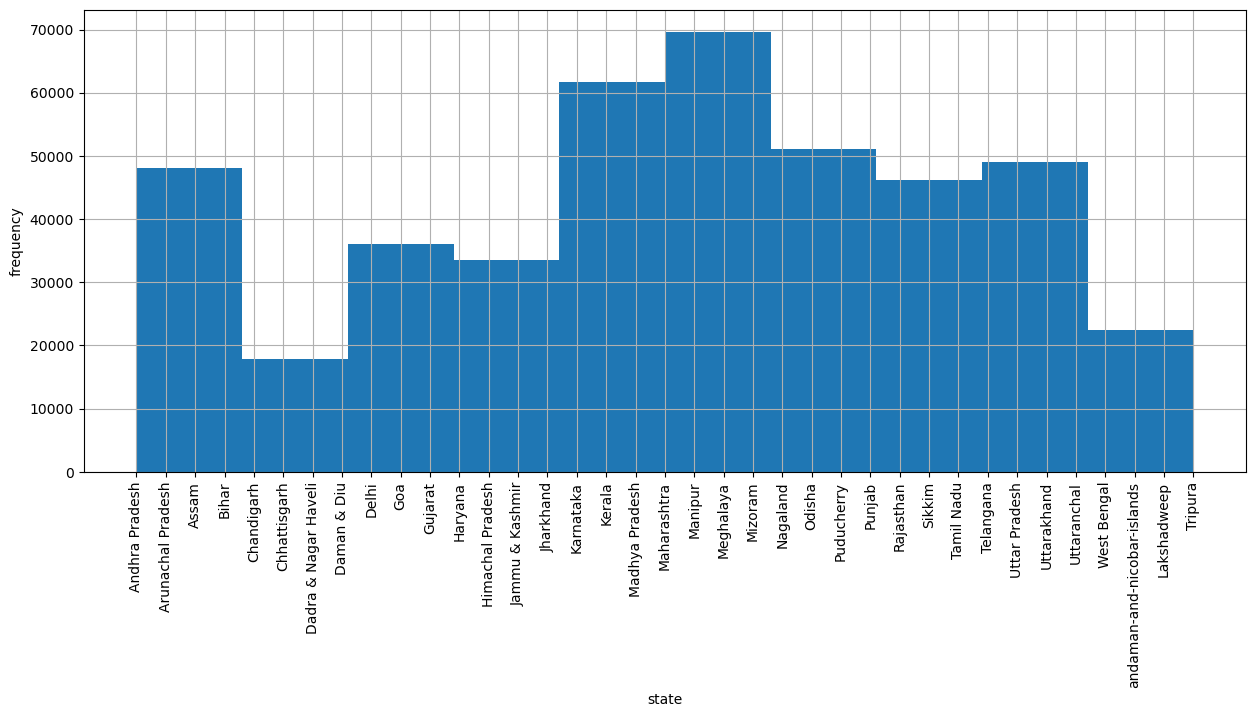

In [18]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.state.hist()
plt.xlabel('state')
plt.ylabel('frequency')
plt.plot()
#THis visulization shows the count on state present in dataset

In [19]:
df['type'].value_counts()

type
Residential, Rural and other Areas    179014
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: count, dtype: int64

[]

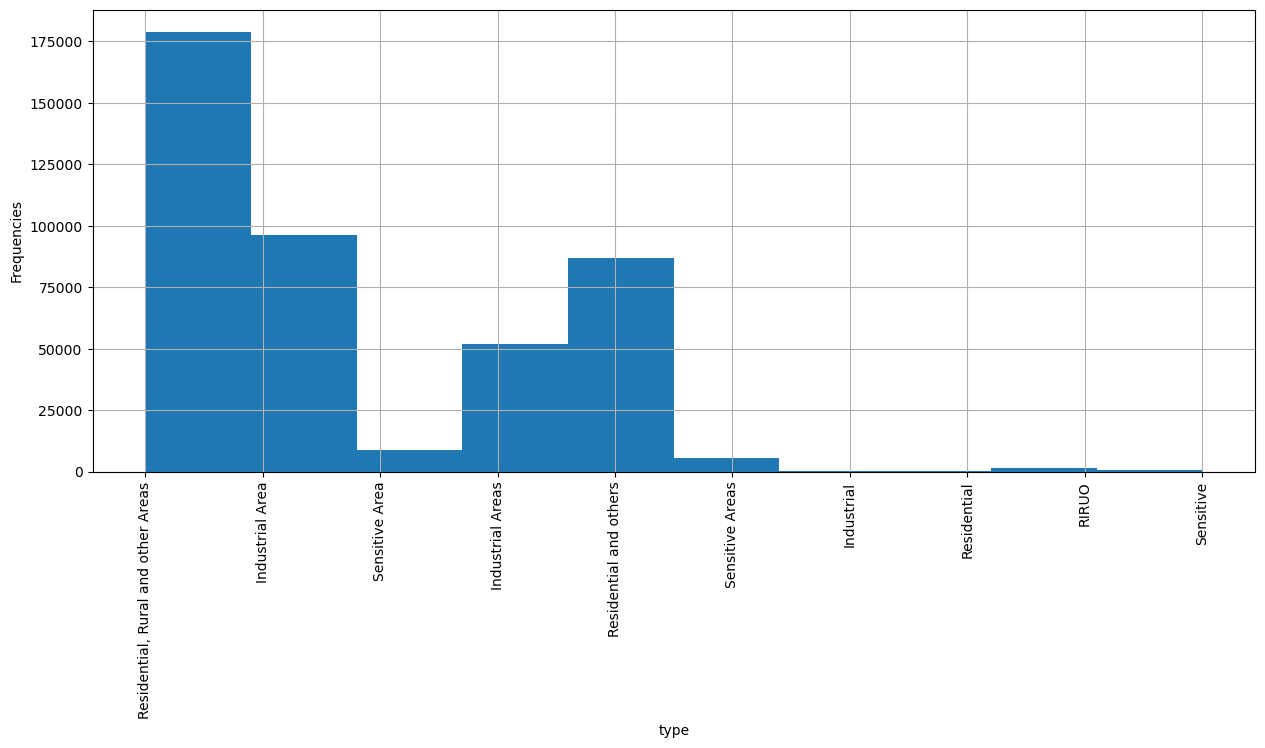

In [20]:
plt.figure(figsize=(15,6))
plt.xticks(rotation = 90)
df.type.hist()
plt.xlabel('type')
plt.ylabel('Frequencies')
plt.plot()

In [21]:
df['agency'].value_counts()

agency
Maharashtra State Pollution Control Board                                 27857
Uttar Pradesh State Pollution Control Board                               22686
Andhra Pradesh State Pollution Control Board                              19139
Himachal Pradesh State Environment Proection & Pollution Control Board    15287
Punjab State Pollution Control Board                                      15232
                                                                          ...  
Arunachal Pradesh State Pollution Control Board                              90
TNPC                                                                         82
RPCB                                                                         63
VRCE                                                                         61
RJPB                                                                         53
Name: count, Length: 64, dtype: int64

[]

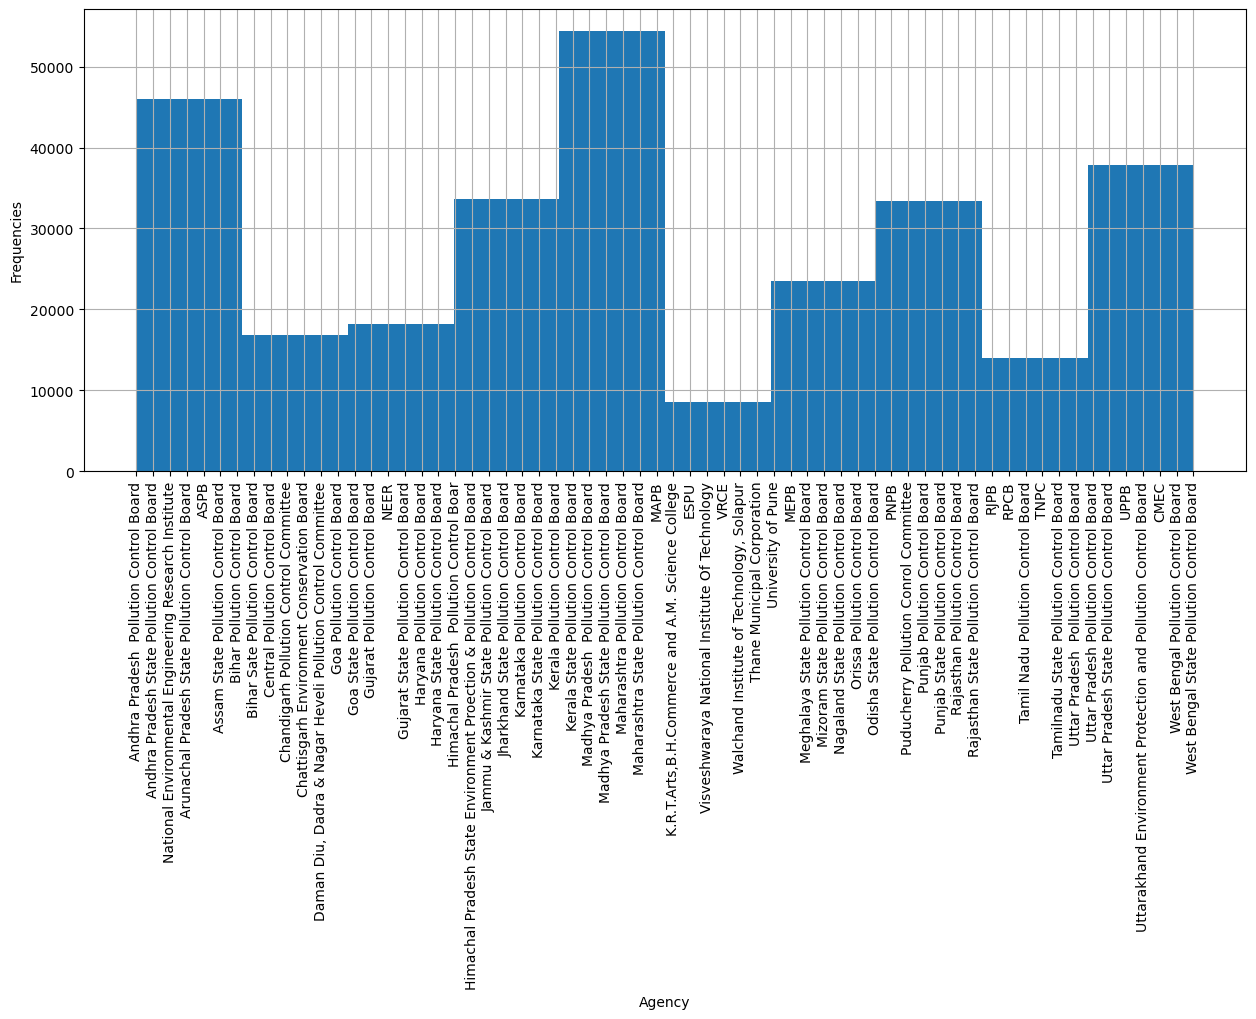

In [22]:
plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
df.agency.hist()
plt.xlabel('Agency')
plt.ylabel('Frequencies')
plt.plot()

<Axes: xlabel='state', ylabel='so2'>

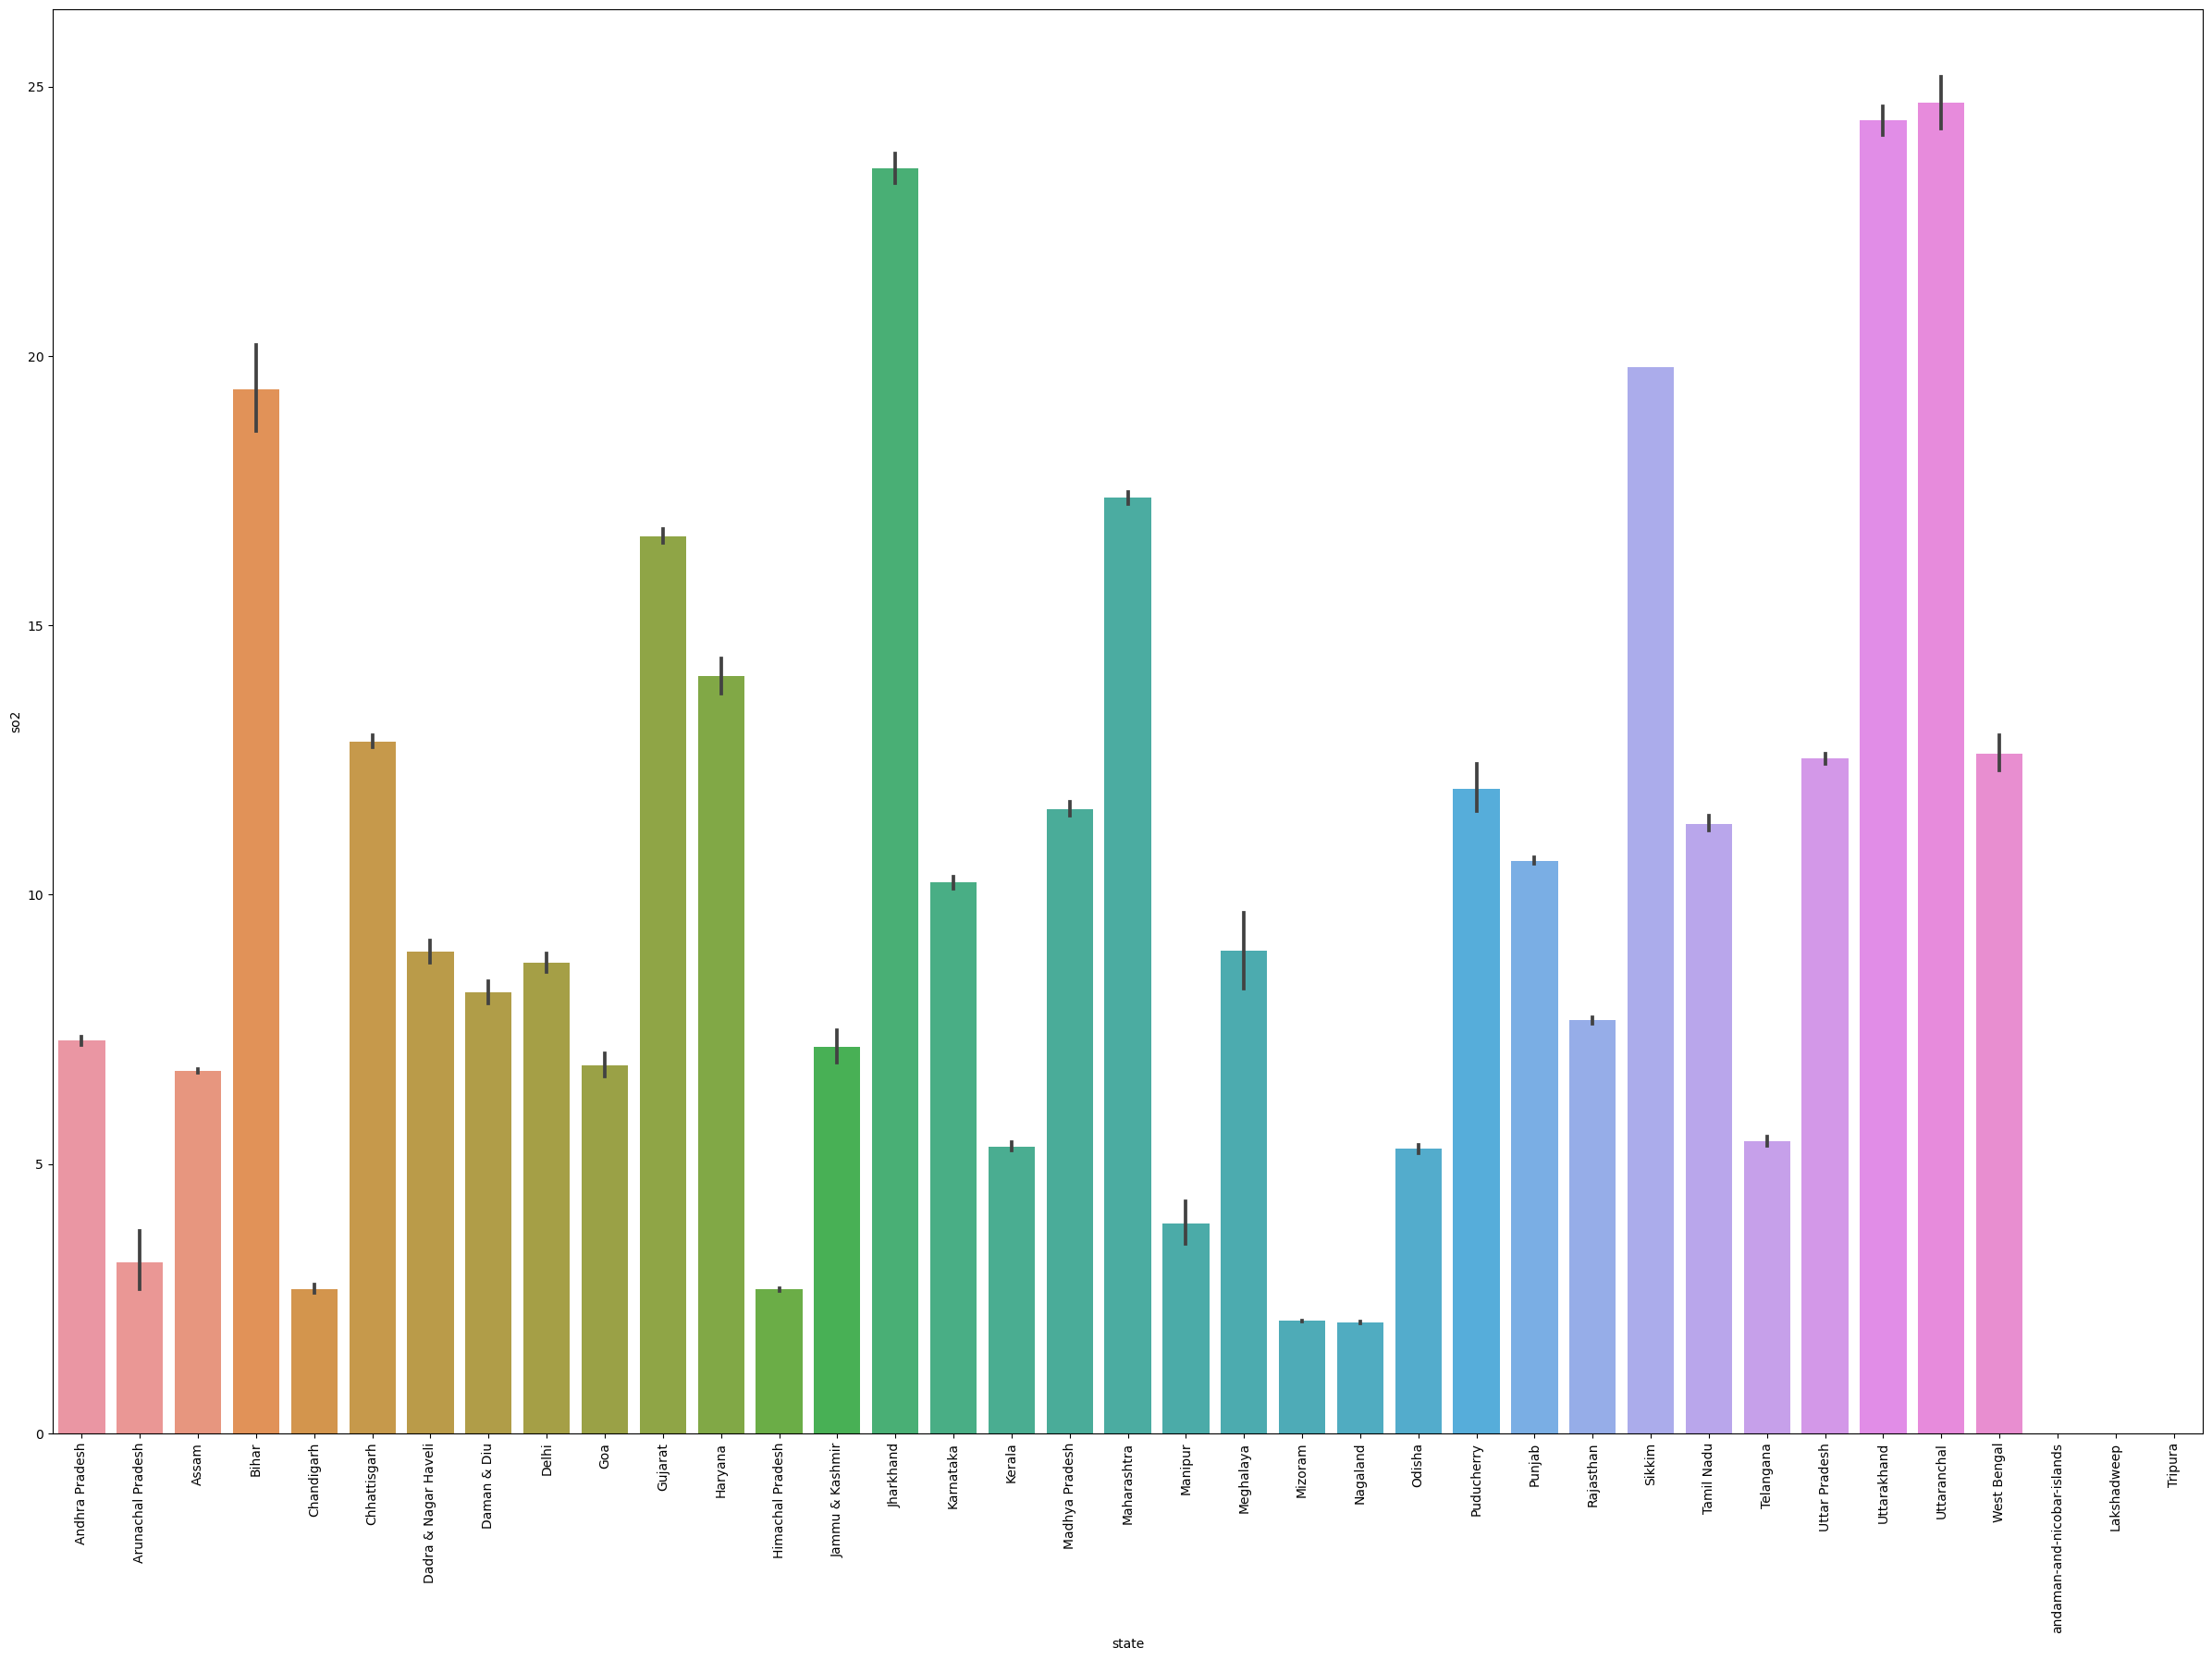

In [23]:
plt.figure(figsize=(30,20))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df)

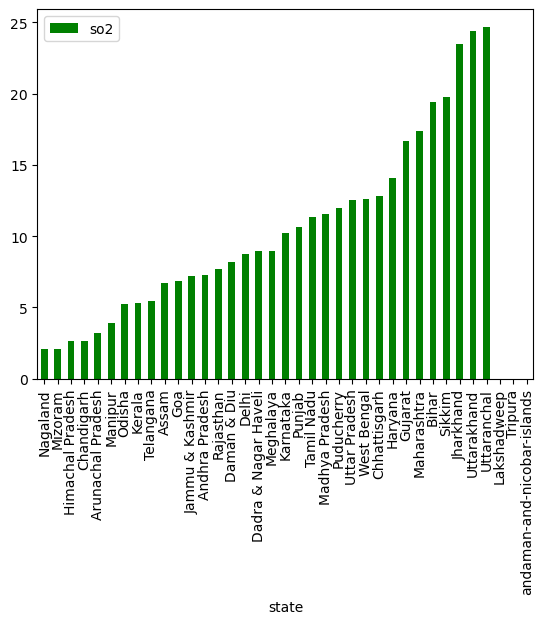

In [24]:
df[['so2','state']].groupby(['state']).mean().sort_values(by='so2').plot.bar(color='green')
plt.show()

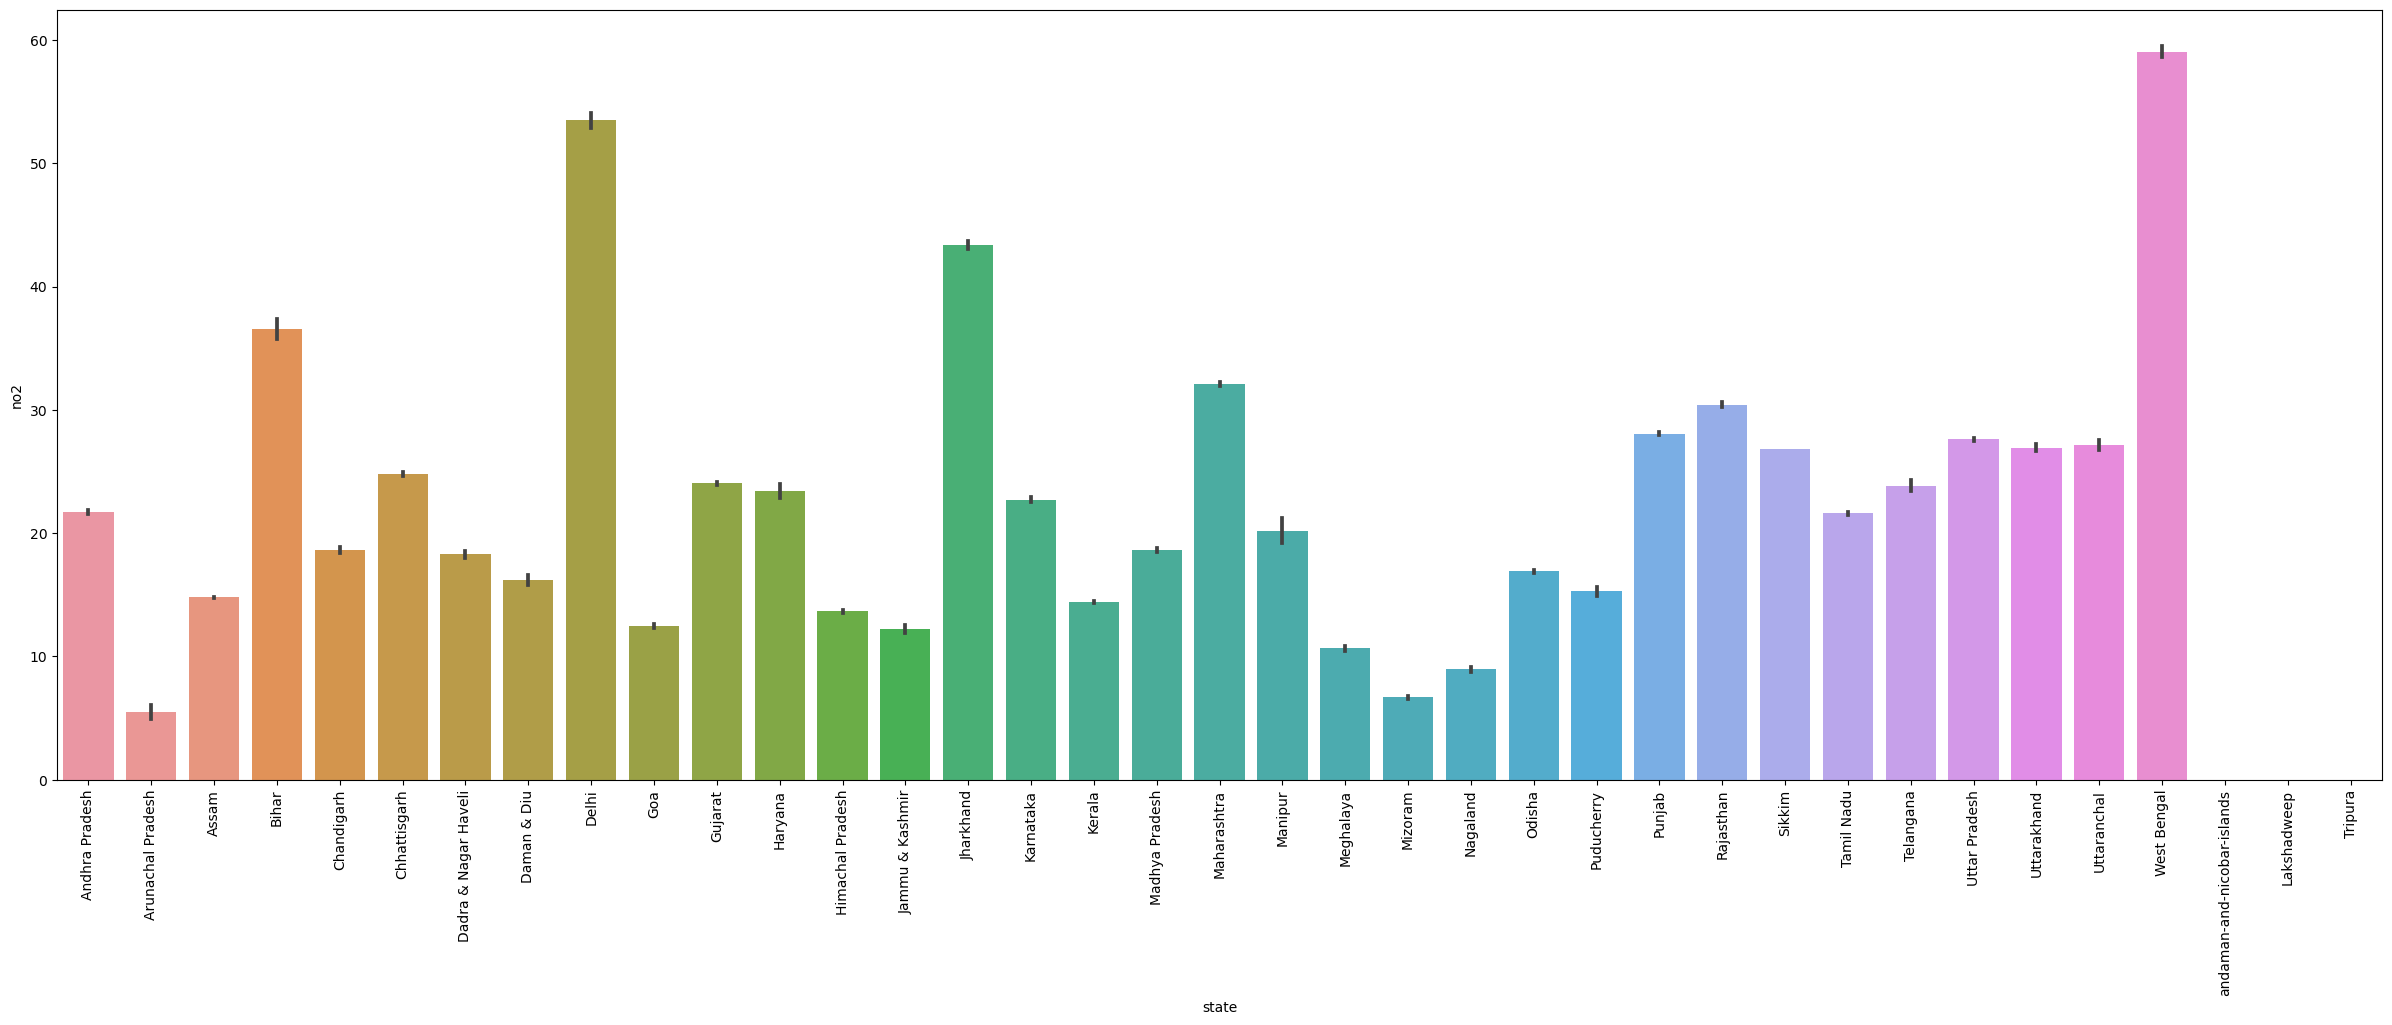

In [25]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=df)
plt.show()


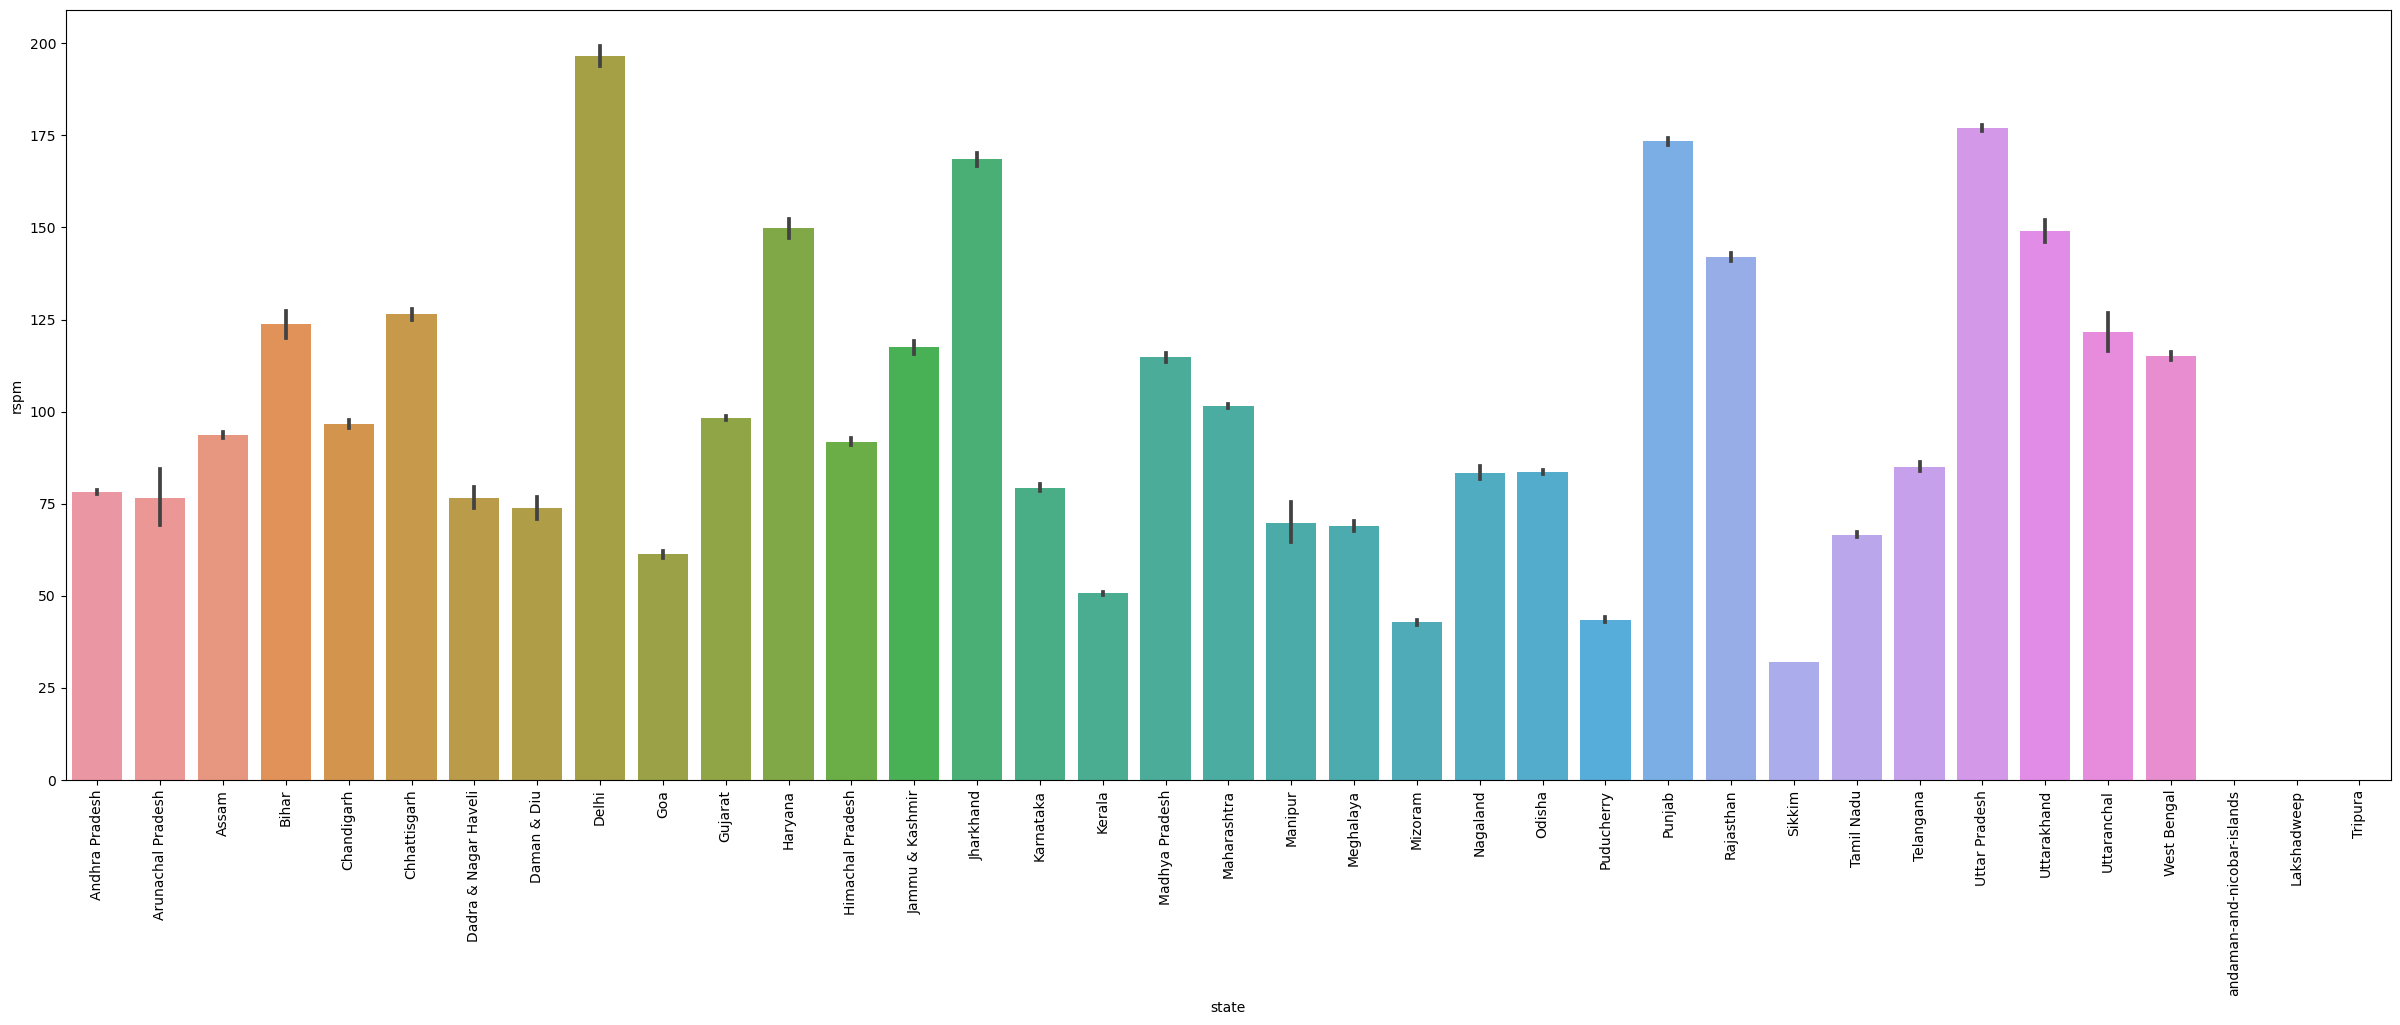

In [26]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=df)
plt.show()

/Users/sumukhsinaikunde/opt/anaconda3/envs/new/lib/python3.9/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
/Users/sumukhsinaikunde/opt/anaconda3/envs/new/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1384: RuntimeWarning: All-NaN slice encountered
  return _nanquantile_unchecked(


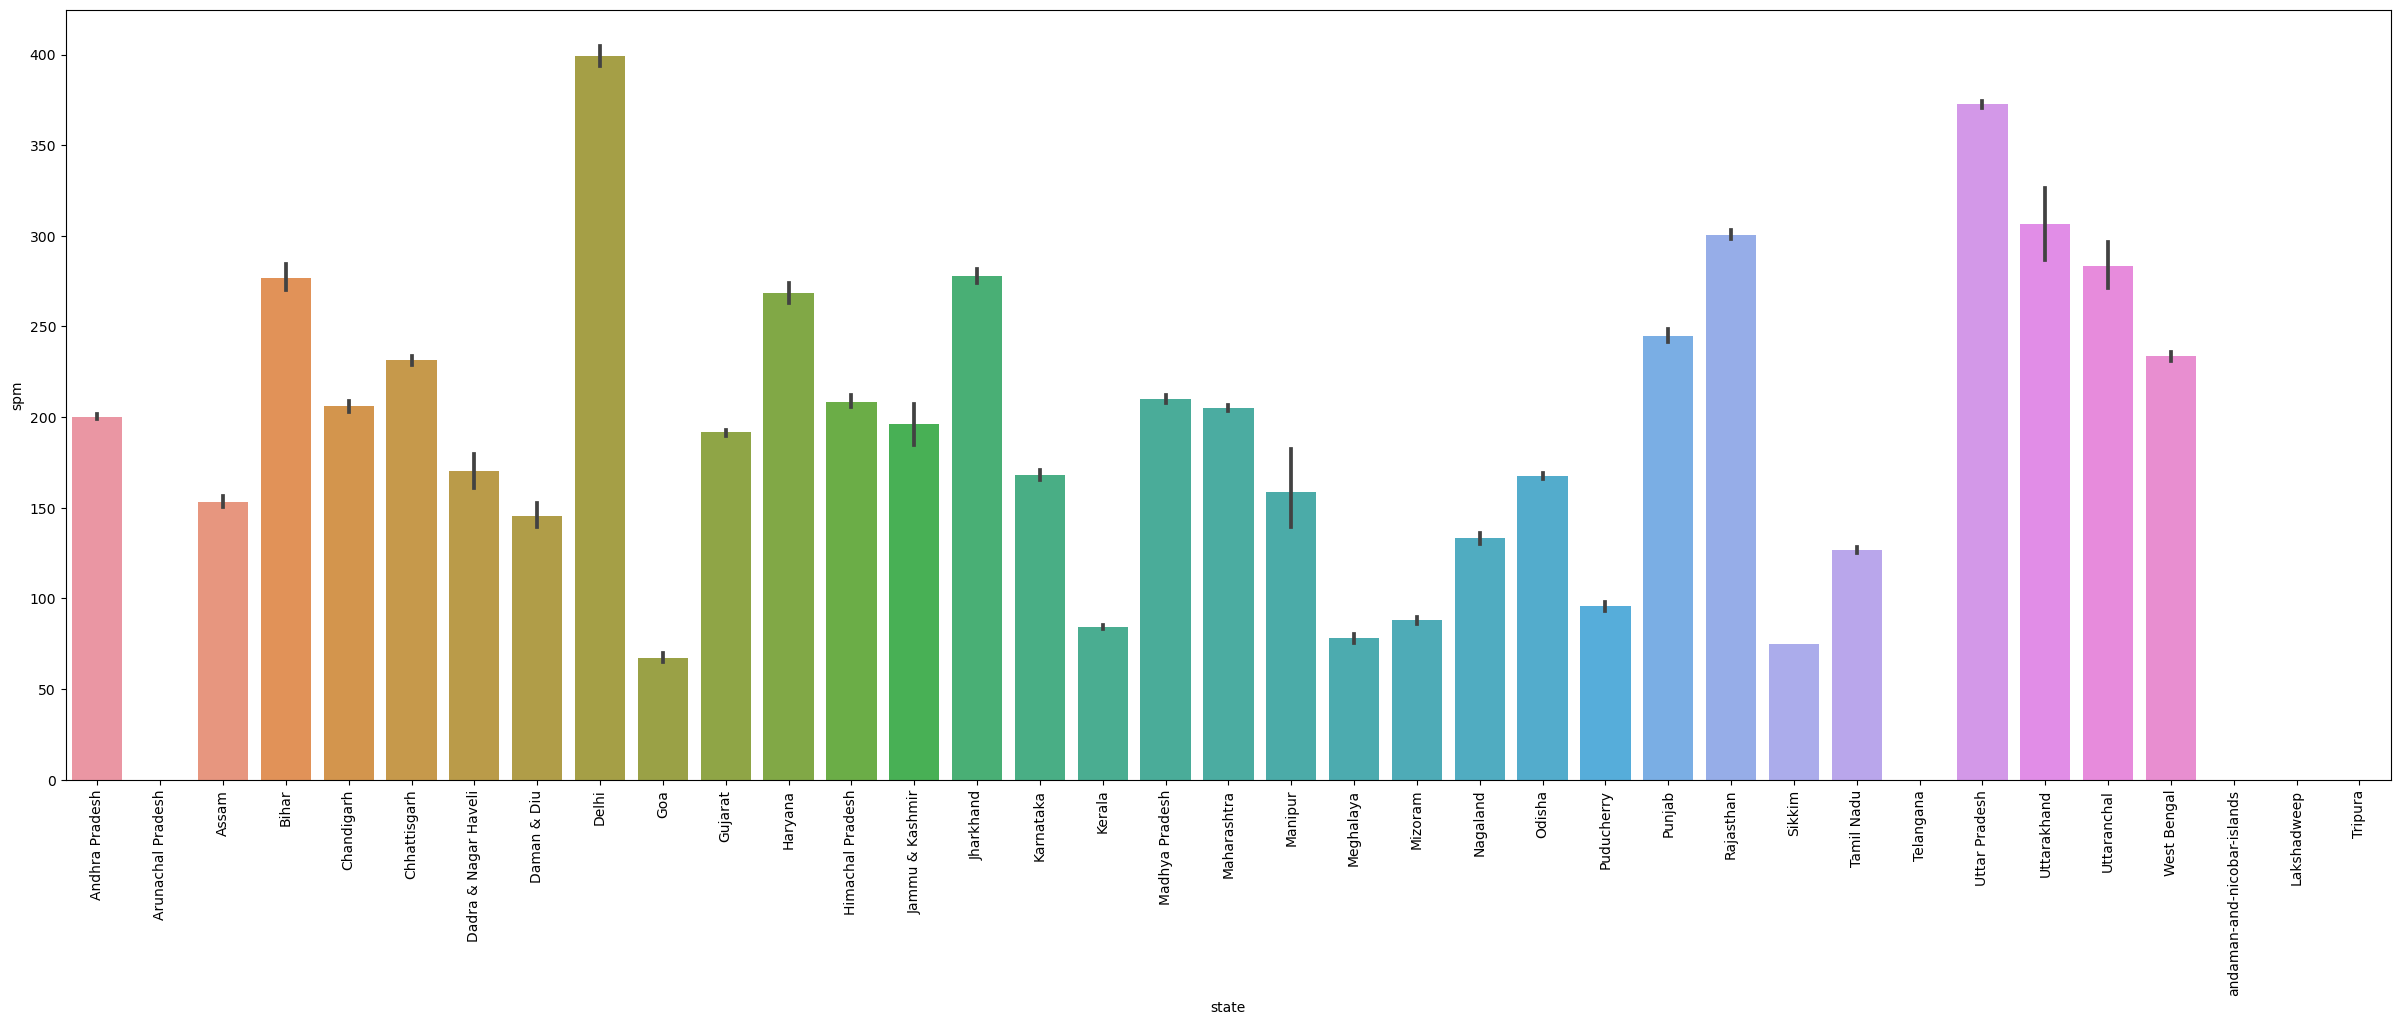

In [27]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='spm',data=df)
plt.show()

### DATA Preprocessing

In [28]:
#checking all null values and treating the null values
nullvalues = df.isnull().sum().sort_values(ascending=False)

In [29]:
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [30]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)

In [31]:
null_values_percentage 

pm2_5                          97.862497
spm                            54.478797
agency                         34.304933
stn_code                       33.064749
rspm                            9.230692
so2                             7.951035
location_monitoring_station     6.309009
no2                             3.725370
type                            1.237659
date                            0.001606
sampling_date                   0.000688
location                        0.000688
state                           0.000000
dtype: float64

In [32]:
missing_data_with_percentage = pd.concat([nullvalues,null_values_percentage ],axis=1,keys=['Total','Percent'])

In [33]:
missing_data_with_percentage

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


In [34]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)

In [35]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN


In [36]:
df.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [37]:
df['location'] = df['location'].fillna(df['location'].mode()[0])
df['type'] =df['type'].fillna(df['type'].mode()[0])

In [38]:
df.fillna(0,inplace=True)

In [39]:
df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

In [40]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0


### Calculate air quality index so2 based on formula

In [41]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [42]:
#Function to calculate no2 individual pollutatant index
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [43]:
#Function to calculate rspm individual pollutatant index
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [44]:
#Function to calculate spm individual pollutatant index
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()
# calculating the individual pollutant index for spm(suspended particulate matter)

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [45]:
#Function to calculate air quality index individual pollutatant index
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [46]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [47]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

AQI_Range
Good              219643
Poor               93272
Moderate           56571
Unhealthy          31733
Hazardous          18700
Very unhealthy     15823
Name: count, dtype: int64

### Spliting the dataset into dependent and independent columns

In [48]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(348593, 4) (87149, 4) (348593,) (87149,)


### LinearRegression

In [51]:
model=LinearRegression()
model.fit(X_train,Y_train)
train_pred=model.predict(X_train)
test_pred=model.predict(X_test)

In [53]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test,Y_test))

RMSE TrainingData =  13.583424938613533
RMSE TestData =  13.672937344788876
--------------------------------------------------
RSquared value on train: 0.9849533579250526
RSquared value on test: 0.9847286394495925


### DecisionTreeRegressor

In [54]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [55]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test,Y_test))

RMSE TrainingData =  13.583424938613533
RMSE TestData =  13.672937344788876
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9998627231689206


### RandomForestRegressor

In [56]:
RF=RandomForestRegressor().fit(X_train,Y_train)
train_preds1=RF.predict(X_train)
test_preds1=RF.predict(X_test)


In [57]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.41672486430444616
RMSE TestData =  1.1514316719897715
--------------------------------------------------
RSquared value on train: 0.9999858381547804
RSquared value on test: 0.9998916995089137


### Classification Algorithms

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [59]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']
# Splitting the data into independent and dependent columns for classification 

In [60]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)
# Splitting the data into training and testing data 

### LogisticRegression

In [61]:
#fit the model on train data 
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train 
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

/Users/sumukhsinaikunde/opt/anaconda3/envs/new/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model accuracy on train is:  0.7275875415743268
Model accuracy on test is:  0.7271184672624222
--------------------------------------------------
KappaScore is:  0.5843647352288941


In [62]:
log_reg.predict([[727,327.55,78.2,100]]) 

/Users/sumukhsinaikunde/opt/anaconda3/envs/new/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Good'], dtype=object)

In [64]:
log_reg.predict([[2.7,45,35.16,23]]) 

/Users/sumukhsinaikunde/opt/anaconda3/envs/new/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Poor'], dtype=object)

In [65]:
log_reg.predict([[10,2.8,82,20]]) 

/Users/sumukhsinaikunde/opt/anaconda3/envs/new/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Good'], dtype=object)

In [66]:
log_reg.predict([[2,45.8,37,32]])

/Users/sumukhsinaikunde/opt/anaconda3/envs/new/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Poor'], dtype=object)

### DecisionTreeClassifier

In [67]:
#fit the model on train data 
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train 
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998052783476477
--------------------------------------------------
KappaScore is:  0.9997111966529943


### RandomForestClassifier

In [68]:
#fit the model on train data 
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train 
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998261413818283
--------------------------------------------------
KappaScore is:  0.999742142161839


### K-NearestNeighbors

In [69]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train 
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9981332228109897
Model accuracy on test is:  0.9966966862547376
--------------------------------------------------
KappaScore is:  0.99509987791221


In [70]:
KNN.predict([[7.4,47.7,78.182,100]]) 
# Predictions on random values

/Users/sumukhsinaikunde/opt/anaconda3/envs/new/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Poor'], dtype=object)

In [71]:
KNN.predict([[1,1.2,3.12,0]]) 

/Users/sumukhsinaikunde/opt/anaconda3/envs/new/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Good'], dtype=object)

In [72]:
KNN.predict([[325.7,345,798.182,203]]) 
# Predictions on random values

/Users/sumukhsinaikunde/opt/anaconda3/envs/new/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Unhealthy'], dtype=object)